In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [3]:
import numpy as np
TrainingEC=np.load('/content/drive/My Drive/Depressiontraintestdataset/TrainingEC.npy')
TrainingEClabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TraininglabelsEC.npy')
testingEC=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestingEC.npy')
testingEClabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestinglabelsEC.npy')

TrainingEO=np.load('/content/drive/My Drive/Depressiontraintestdataset/TrainingEO.npy')
TrainingEOlabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TraininglabelsEO.npy')
testingEO=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestingEO.npy')
testingEOlabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestinglabelsEO.npy')

In [4]:
print(TrainingEC.shape)
print(TrainingEClabel.shape)
print(testingEC.shape)
print(testingEClabel.shape)

(1512, 500, 19)
(1512, 2)
(378, 500, 19)
(378, 2)


In [9]:
# prepare dataset for 1DCNN model
temporal_dimension = TrainingEC.shape[1]
num_channels = TrainingEC.shape[2]

In [10]:
print(temporal_dimension)
print(num_channels)

500
19


In [7]:
from __future__ import print_function
from matplotlib import pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#import coremltools
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import Dense, Dropout
from keras.layers import LSTM

time_steps=500
n_features=19
# code for building an LSTM with 100 neurons and dropout. Runs for 50 epochs

model = Sequential()
model.add(LSTM(100, return_sequences=False, input_shape=(time_steps, n_features)))
model.add(Dropout(0.5))
#model.add(LSTM(100)) dramatically worse results
model.add(Dense(2, activation='sigmoid'))
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['acc'])

BATCH_SIZE = 100
EPOCHS = 50

history = model.fit(TrainingEC,
                      TrainingEClabel,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)



Epoch 1/50
13/13 [==============================] - 1s 85ms/step - loss: 0.7120 - acc: 0.5525 - val_loss: 0.6627 - val_acc: 0.6436
Epoch 2/50
13/13 [==============================] - 1s 57ms/step - loss: 0.6358 - acc: 0.6675 - val_loss: 0.6343 - val_acc: 0.6898
Epoch 3/50
13/13 [==============================] - 1s 50ms/step - loss: 0.5892 - acc: 0.7204 - val_loss: 0.6181 - val_acc: 0.7096
Epoch 4/50
13/13 [==============================] - 1s 52ms/step - loss: 0.5580 - acc: 0.7395 - val_loss: 0.6070 - val_acc: 0.7162
Epoch 5/50
13/13 [==============================] - 0s 34ms/step - loss: 0.5254 - acc: 0.7585 - val_loss: 0.5938 - val_acc: 0.7195
Epoch 6/50
13/13 [==============================] - 0s 35ms/step - loss: 0.5068 - acc: 0.7709 - val_loss: 0.5882 - val_acc: 0.7195
Epoch 7/50
13/13 [==============================] - 0s 34ms/step - loss: 0.4769 - acc: 0.7974 - val_loss: 0.5800 - val_acc: 0.7129
Epoch 8/50
13/13 [==============================] - 1s 48ms/step - loss: 0.4567 - a

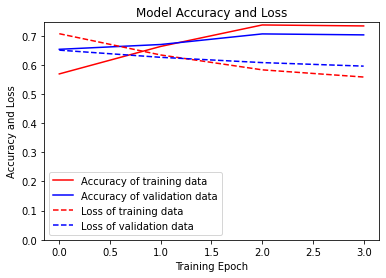

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
for layer in model.layers:
  print(layer.name) 
  print(layer.get_config(), layer.get_weights())

lstm
{'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, 500, 19), 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 100, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 2} [array([[-0.02912389,  0.11521989, -0.00358987, ...,  0.06633064,
         0.10143164, -0.07586765],
       [-0.07222737,  0.07104366, -0.11786211, ...,  0.047591

In [ ]:
# model configuration
for layer in model.layers:
  print(layer.name) 
  #print(layer.get_config(), layer.get_weights())


#print(layer.get_config())
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print(weights.shape)
print(biases.shape)

weights = model.layers[2].get_weights()[0]
biases = model.layers[2].get_weights()[1]
print(weights.shape)
print(biases.shape)


lstm
dropout
dense
(19, 400)
(100, 400)
(100, 2)
(2,)


In [ ]:
print(testingEC.shape)
print(testingEClabel.shape)
# accuracy on test data
#y_testEC= np_utils.to_categorical(testingEC,2)

score = model.evaluate(testingEC, testingEClabel, verbose=1)

print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])

(378, 500, 19)
(378, 2)
12/12 [==============================] - 0s 14ms/step - loss: 0.5622 - acc: 0.7169

Accuracy on test data: 0.72

Loss on test data: 0.56


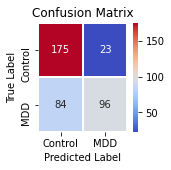

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       198
           1       0.81      0.53      0.64       180

    accuracy                           0.72       378
   macro avg       0.74      0.71      0.70       378
weighted avg       0.74      0.72      0.71       378



In [ ]:
LABELS = ['Control','MDD']
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(2, 2))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


y_pred_test = model.predict(testingEC)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(testingEClabel, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Multipule layer LSTM Model
temporal_dimension = TrainingEC.shape[1]
num_channels = TrainingEC.shape[2]
num_classes = 2
model2= Sequential()
#model2= Sequential()
# First LSTM layer with Dropout regularisation
#model2.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1],train_X.shape[2])))
#model2.add(LSTM(50,return_sequences=True, input_dim=19, input_length=256))
model2.add(LSTM(64,return_sequences=True, input_shape=(temporal_dimension,num_channels)))
model2.add(Dropout(0.2))
# Second LSTM layer
model2.add(LSTM(units=64, return_sequences=True))
model2.add(Dropout(0.1))
# Third LSTM layer
model2.add(LSTM(units=50, return_sequences=True))
model2.add(Dropout(0.2))
#model2.add(LSTM(units=64, return_sequences=True))
#model2.add(Dropout(0.2))
## Fourth LSTM layer
model2.add(LSTM(units=64))
#model2.add(Dropout(0.1))
# The output layer
model2.add(Dense(units=2))
model2.add(Activation('sigmoid'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 500, 64)           21504     
_________________________________________________________________
dropout_9 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 500, 64)           33024     
_________________________________________________________________
dropout_10 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 500, 50)           23000     
_________________________________________________________________
dropout_11 (Dropout)         (None, 500, 50)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)               

In [ ]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_modellstmmulti.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model2.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['acc'])

BATCH_SIZE = 100
EPOCHS = 50

history = model2.fit(TrainingEC,
                      TrainingEClabel,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.1,
                      verbose=1)


Epoch 1/50
14/14 [==============================] - 2s 163ms/step - loss: 0.6293 - acc: 0.6654 - val_loss: 0.4991 - val_acc: 0.7829
Epoch 2/50
14/14 [==============================] - 1s 82ms/step - loss: 0.5386 - acc: 0.7419 - val_loss: 0.4776 - val_acc: 0.8026
Epoch 3/50
14/14 [==============================] - 1s 81ms/step - loss: 0.4685 - acc: 0.7956 - val_loss: 0.4552 - val_acc: 0.8158
Epoch 4/50
14/14 [==============================] - 1s 82ms/step - loss: 0.3969 - acc: 0.8412 - val_loss: 0.4250 - val_acc: 0.8158
Epoch 5/50
14/14 [==============================] - 1s 78ms/step - loss: 0.3403 - acc: 0.8735 - val_loss: 0.4345 - val_acc: 0.8158
Epoch 6/50
14/14 [==============================] - 1s 79ms/step - loss: 0.3484 - acc: 0.8721 - val_loss: 0.5063 - val_acc: 0.7566


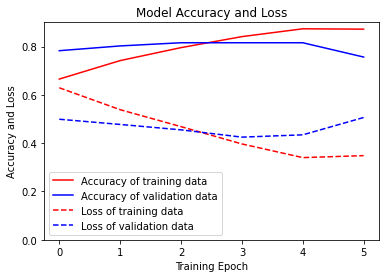

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
#%accuracy on test data
#y_testEO = np_utils.to_categorical(y_testEO,2)

score = model2.evaluate(testingEC, testingEClabel, verbose=1)

print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])

12/12 [==============================] - 0s 35ms/step - loss: 0.5109 - acc: 0.7460

Accuracy on test data: 0.75

Loss on test data: 0.51


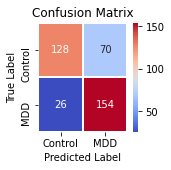

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       198
           1       0.69      0.86      0.76       180

    accuracy                           0.75       378
   macro avg       0.76      0.75      0.74       378
weighted avg       0.76      0.75      0.74       378



In [ ]:
LABELS = ['Control','MDD']
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(2, 2))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


y_pred_test = model2.predict(testingEC)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(testingEClabel, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
# Bidrectional LSTM model

In [12]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Activation, Dropout,Bidirectional
import pandas as pd
import math
import numpy as np
import pandas as pd
import seaborn as sns
#import coremltools
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import Dense, Dropout
from keras.layers import LSTM

model2b= Sequential()
# First LSTM layer with Dropout regularisation
model2b.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(TrainingEC.shape[1],TrainingEC.shape[2])))
model2b.add(Dropout(0.2))
# Second LSTM layer
#model2.add(Bidirectional(LSTM(units=50),input_shape=(train_X.shape[1],train_X.shape[2]))
##model2.add(Dropout(0.2))
## Third LSTM layer
#model2.add(Bidirectional(LSTM(units=50), return_sequences=True)))
##model2.add(Dropout(0.2))
## Fourth LSTM layer
#model2.add(Bidirectional(LSTM(units=50), return_sequences=True)))
##model2.add(Dropout(0.2))
## The output layer
model2b.add(Dense(units=2))
model2b.add(Activation('sigmoid'))
model2b.summary()

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_modellstmbilstm.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model2b.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['acc'])

BATCH_SIZE = 400
EPOCHS = 50

history = model2b.fit(TrainingEC,
                      TrainingEClabel,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 100)               28000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 28,202
Trainable params: 28,202
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 4s 968ms/step - loss: nan - acc: 0.4781 - val_loss: nan - val_acc: 0.5446
Epoch 2/50
4/4 [==============================] - 4s 949ms/step - loss: nan - acc: 0.5186 - val_loss: nan - val_acc: 0.5446
